In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import geopy
import geocoder
from geopy.geocoders import Nominatim
from datetime import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('final.csv',index_col = 0)
df['Hour'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')).astype('int64')
df['Month'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%m')).astype('int64')
df['Date'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%d-%m-%Y'))
df['Day'] = df['Date'].apply(lambda x : list(map(int,x.split('-')))).apply(lambda x : date(x[2],x[1],x[0]).weekday())
df['Time'] = pd.to_datetime(df['Time'])
df = df.drop('Coordinates',axis = 1)

In [3]:
cities = list(set(list(df.City)))
len(cities)

119

In [4]:
locator = Nominatim(user_agent="abc",timeout = 100)

coord = {}
for i,city in enumerate(cities):
    lc = locator.geocode(city)
    try:
        print(str(i+1)+'.'+ city + ' SUCCESS!')
        coord[city] = [lc.latitude,lc.longitude]
    except AttributeError:
        print(str(i+1)+'.'+city + ' DATA not available')

print(len(coord))   
coord

1.Mandideep SUCCESS!
2.Faridabad SUCCESS!
3.Hyderabad SUCCESS!
4.Delhi SUCCESS!
5.Eloor SUCCESS!
6.Bulandshahr SUCCESS!
7.Kurukshetra SUCCESS!
8.Noida SUCCESS!
9.Visakhapatnam SUCCESS!
10.Gwalior SUCCESS!
11.Gaya SUCCESS!
12.Vapi SUCCESS!
13.Paravattani SUCCESS!
14.Talcher SUCCESS!
15.Navi Mumbai SUCCESS!
16.Bagalkot SUCCESS!
17.Singrauli SUCCESS!
18.Greater Noida SUCCESS!
19.Amaravati SUCCESS!
20.Baghpat SUCCESS!
21.Karnal SUCCESS!
22.Pune SUCCESS!
23.Khanna SUCCESS!
24.Mandi Gobindgarh SUCCESS!
25.Mumbai SUCCESS!
26.Jaipur SUCCESS!
27.Varanasi SUCCESS!
28.Mandikhera SUCCESS!
29.Moradabad SUCCESS!
30.Mysuru SUCCESS!
31.Sirsa SUCCESS!
32.Panipat SUCCESS!
33.Sagar SUCCESS!
34.Ambala SUCCESS!
35.Kollam SUCCESS!
36.Bhopal SUCCESS!
37.Gurugram SUCCESS!
38.Lucknow SUCCESS!
39.Kannur SUCCESS!
40.Bathinda SUCCESS!
41.Muzaffarpur SUCCESS!
42.Hapur SUCCESS!
43.Coimbatore SUCCESS!
44.Damoh SUCCESS!
45.Nandesari SUCCESS!
46.Amritsar SUCCESS!
47.Bhiwani SUCCESS!
48.Chandrapur SUCCESS!
49.Nashik SU

{'Mandideep': [23.0965633, 77.5144525],
 'Faridabad': [28.4029786, 77.3103837],
 'Hyderabad': [17.38878595, 78.46106473453146],
 'Delhi': [28.6273928, 77.1716954],
 'Eloor': [10.06946315, 76.30727493919397],
 'Bulandshahr': [28.38886085, 77.97479772598118],
 'Kurukshetra': [29.9693747, 76.8482787],
 'Noida': [28.5356329, 77.3910727],
 'Visakhapatnam': [17.7231276, 83.3012842],
 'Gwalior': [26.2037247, 78.1573628],
 'Gaya': [24.7964355, 85.0079563],
 'Vapi': [20.3735482, 72.9084376],
 'Paravattani': [10.5190245, 76.241875],
 'Talcher': [20.9458183, 85.2111736],
 'Navi Mumbai': [19.0308262, 73.0198537],
 'Bagalkot': [16.1853166, 75.6967919],
 'Singrauli': [24.1974432, 82.6661453],
 'Greater Noida': [28.4670734, 77.5137649],
 'Amaravati': [16.4998534, 81.3300812],
 'Baghpat': [28.97240405, 77.33315284938224],
 'Karnal': [29.6803266, 76.9896254],
 'Pune': [18.521428, 73.8544541],
 'Khanna': [31.0782705, 75.1318503],
 'Mandi Gobindgarh': [30.6518301, 76.2998708],
 'Mumbai': [18.9387711, 72.

In [5]:
df['Coordinates'] = df.City.map(coord)

In [6]:
cols = ['City','Coordinates','Time','Month','Hour','Date','Day','PM2.5_min','PM2.5_avg','PM2.5_max']
df_1 = df[cols].copy()
df_1

,City,Coordinates,Time,Month,Hour,Date,Day,PM2.5_min,PM2.5_avg,PM2.5_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,59.000000,134.000000,239.000000
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,42.000000,111.000000,227.000000
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,13.000000,48.000000,89.000000
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,29.000000,65.000000,147.000000
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,60.000000,71.000000,81.000000
...,...,...,...,...,...,...,...,...,...,...
32426,Vijayapura,"[16.666667, 75.916667]",2020-10-21 22:00:00,10,22,21-10-2020,2,42.000000,55.000000,66.000000
32427,Visakhapatnam,"[17.7231276, 83.3012842]",2020-10-21 22:00:00,10,22,21-10-2020,2,15.000000,76.000000,182.000000
32428,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-10-21 22:00:00,10,22,21-10-2020,2,71.000000,201.000000,353.000000
32429,Kolkata,"[22.54541245, 88.3567751581234]",2020-10-21 22:00:00,10,22,21-10-2020,2,8.428571,19.857143,37.857143


### Taking average for all cities over the period of data collection


In [7]:
df_1 = df_1[(df_1.Hour >= 7) & (df_1.Hour <= 22)]
df_1.head()

,City,Coordinates,Time,Month,Hour,Date,Day,PM2.5_min,PM2.5_avg,PM2.5_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,59.0,134.0,239.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,42.0,111.0,227.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,13.0,48.0,89.0
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,29.0,65.0,147.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,60.0,71.0,81.0


In [8]:
cities = sorted(list(set(df_1.City.to_list())))
print(len(cities))

119


In [9]:
list_dict = []
# 
for city in cities:
    dict_PM2 = {}
    dict_PM2['City'] = city
    dict_PM2['Max'] = df_1.loc[df_1.City == city]['PM2.5_max'].mean()
    dict_PM2['Avg'] = df_1.loc[df_1.City == city]['PM2.5_avg'].mean()
    dict_PM2['Min'] = df_1.loc[df_1.City == city]['PM2.5_min'].mean()
    dict_PM2['Coordinates'] = df_1.loc[df_1.City == city]['Coordinates'].values[0]
    list_dict.append(dict_PM2)
list_dict

[{'City': 'Agra',
  'Max': 304.6692607003891,
  'Avg': 221.03112840466926,
  'Min': 102.76264591439688,
  'Coordinates': [27.1752554, 78.0098161]},
 {'City': 'Ahmedabad',
  'Max': 225.38490566037737,
  'Avg': 104.19622641509434,
  'Min': 45.17358490566038,
  'Coordinates': [23.0216238, 72.5797068]},
 {'City': 'Ajmer',
  'Max': 157.59591836734694,
  'Avg': 84.00816326530612,
  'Min': 35.80816326530612,
  'Coordinates': [26.4691, 74.639]},
 {'City': 'Alwar',
  'Max': 101.17358490566038,
  'Avg': 77.88301886792453,
  'Min': 64.3811320754717,
  'Coordinates': [27.639077049999997, 76.6144524902045]},
 {'City': 'Amaravati',
  'Max': 60.947169811320755,
  'Avg': 39.49811320754717,
  'Min': 22.935849056603775,
  'Coordinates': [16.4998534, 81.3300812]},
 {'City': 'Ambala',
  'Max': 256.44150943396227,
  'Avg': 178.1433962264151,
  'Min': 94.42264150943396,
  'Coordinates': [30.3843674, 76.770421]},
 {'City': 'Amritsar',
  'Max': 230.09795918367348,
  'Avg': 139.84897959183672,
  'Min': 61.9306

In [10]:
df_avg = pd.DataFrame(list_dict)
df_avg = df_avg.round(2)
df_avg.head()

,City,Max,Avg,Min,Coordinates
0,Agra,304.67,221.03,102.76,"[27.1752554, 78.0098161]"
1,Ahmedabad,225.38,104.20,45.17,"[23.0216238, 72.5797068]"
2,Ajmer,157.60,84.01,35.81,"[26.4691, 74.639]"
3,Alwar,101.17,77.88,64.38,"[27.639077049999997, 76.6144524902045]"
4,Amaravati,60.95,39.50,22.94,"[16.4998534, 81.3300812]"


In [11]:
df_avg.describe()

,Max,Avg,Min
count,118.000000,118.000000,118.000000
mean,179.587458,105.434831,48.942712
std,98.102111,67.905447,31.732342
min,17.740000,10.630000,2.000000
25%,93.825000,48.142500,24.792500
50%,169.410000,89.105000,42.250000
75%,264.332500,145.182500,68.085000
max,368.780000,291.300000,179.520000


In [12]:
def Radius(df,val):
    df[val+'_rad'] = np.sqrt(df[val])

In [13]:
def Create_Map():
    m3 = folium.Map(location = [23.2584857, 77.401989],zoom_start = 4.5,prefer_canvas=True)
    folium.TileLayer('Stamen Terrain').add_to(m3)
    folium.TileLayer('Stamen Toner').add_to(m3)
    folium.TileLayer('Stamen Water Color').add_to(m3)
    folium.TileLayer('cartodbpositron').add_to(m3)
    folium.TileLayer('cartodbdark_matter').add_to(m3)
    folium.LayerControl().add_to(m3)
    
    return m3

In [14]:
Radius(df_avg,'Avg')

In [15]:
PM2_map = Create_Map()

In [16]:
for city in df_avg.City :
    
    display = city +' '+ str(df_avg.loc[df_avg.City == city ,'Avg'].item())    

    if df_avg.loc[df_avg.City == city ,'Avg'].item() >= 145.18: 
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#FF5733',
                fill_color='#FF5733',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(PM2_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 89.10:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EE8C31',
                fill_color='#EE8C31',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(PM2_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 48.14:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EEE231',
                fill_color='#EEE231',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(PM2_map)
        
    else:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#5FFF33',
                fill_color='#5FFF33',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(PM2_map)
        

In [17]:
PM2_map

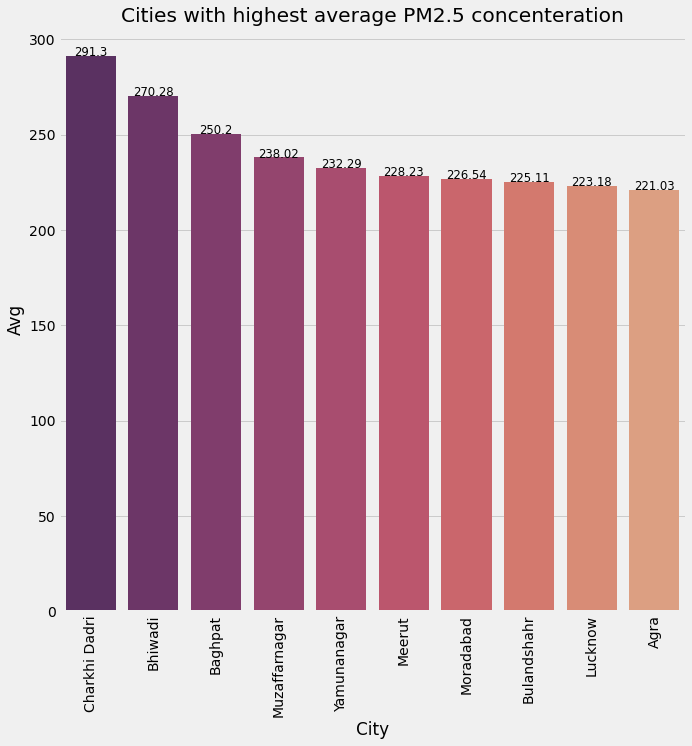

In [18]:
plt.figure(figsize=(10,10))
df_avg_top10 = df_avg.sort_values(by = 'Avg' ,ascending =False).head(10).reset_index()
pal = reversed(sns.color_palette('flare', len(df_avg_top10)))
g=sns.barplot(x='City',y='Avg',data=df_avg_top10, palette=pal)

for index, row in df_avg_top10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with highest average PM2.5 concenteration')
plt.xticks(rotation = 90)
plt.show()

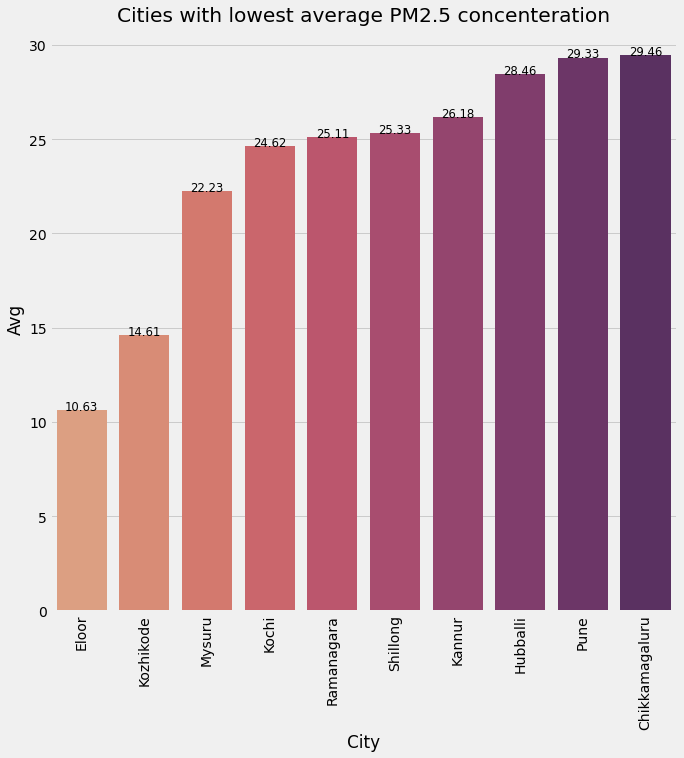

In [19]:
plt.figure(figsize=(10,10))
df_avg_last10 = df_avg.sort_values(by = 'Avg' ,ascending =False).dropna().tail(10).sort_values(by = 'Avg').reset_index()
g=sns.barplot(x='City',y='Avg',data=df_avg_last10, palette='flare')

for index, row in df_avg_last10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with lowest average PM2.5 concenteration')
plt.xticks(rotation = 90)
plt.show()

In [20]:
df_2 = df[cols].copy()
delhi = df_2.loc[df_2.City == 'Delhi'].copy()
print(delhi.shape)
delhi = delhi.reset_index(drop = True)
delhi = delhi.round(2)
delhi.head()

(300, 10)


,City,Coordinates,Time,Month,Hour,Date,Day,PM2.5_min,PM2.5_avg,PM2.5_max
0,Delhi,"[28.6273928, 77.1716954]",2020-09-22 14:00:00,9,14,22-09-2020,1,31.21,96.82,189.62
1,Delhi,"[28.6273928, 77.1716954]",2020-09-22 16:00:00,9,16,22-09-2020,1,29.21,90.56,185.97
2,Delhi,"[28.6273928, 77.1716954]",2020-09-22 19:00:00,9,19,22-09-2020,1,23.60,81.40,179.43
3,Delhi,"[28.6273928, 77.1716954]",2020-09-22 22:00:00,9,22,22-09-2020,1,22.74,73.91,172.26
4,Delhi,"[28.6273928, 77.1716954]",2020-09-23 04:00:00,9,4,23-09-2020,2,21.80,59.06,142.31


In [21]:
delhi.describe()

,Month,Hour,Day,PM2.5_min,PM2.5_avg,PM2.5_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,77.329667,196.601333,301.803967
std,0.370287,5.458002,1.871871,37.487731,66.062516,71.287622
min,9.000000,0.000000,0.000000,13.140000,40.310000,81.940000
25%,10.000000,9.000000,1.000000,54.112500,139.820000,253.932500
50%,10.000000,13.000000,2.000000,63.200000,207.240000,316.790000
75%,10.000000,17.000000,4.000000,88.347500,255.562500,358.620000
max,10.000000,23.000000,6.000000,181.640000,310.820000,407.380000


(265, 10)


<AxesSubplot:xlabel='Day', ylabel='PM2.5_avg'>

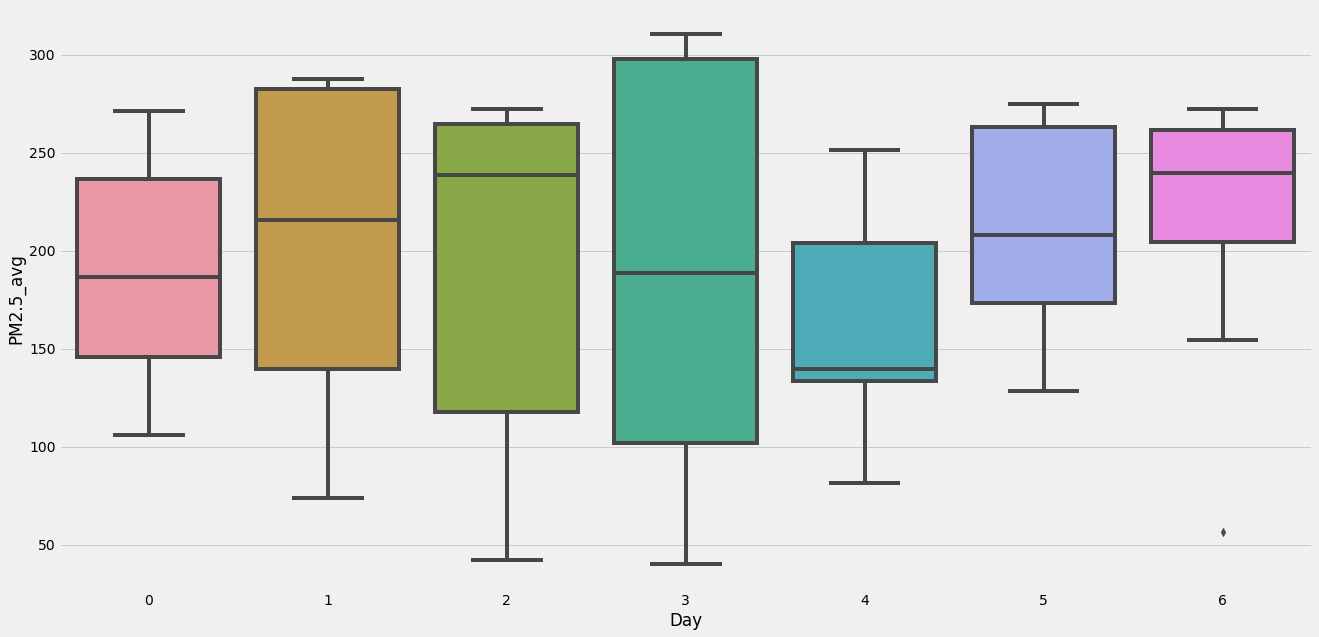

In [22]:
delhi = delhi[(delhi.Hour >= 7) & (delhi.Hour <= 22)]
print(delhi.shape)
plt.figure(figsize = (20,10))
sns.boxplot(y = 'PM2.5_avg',x = 'Day',data = delhi)

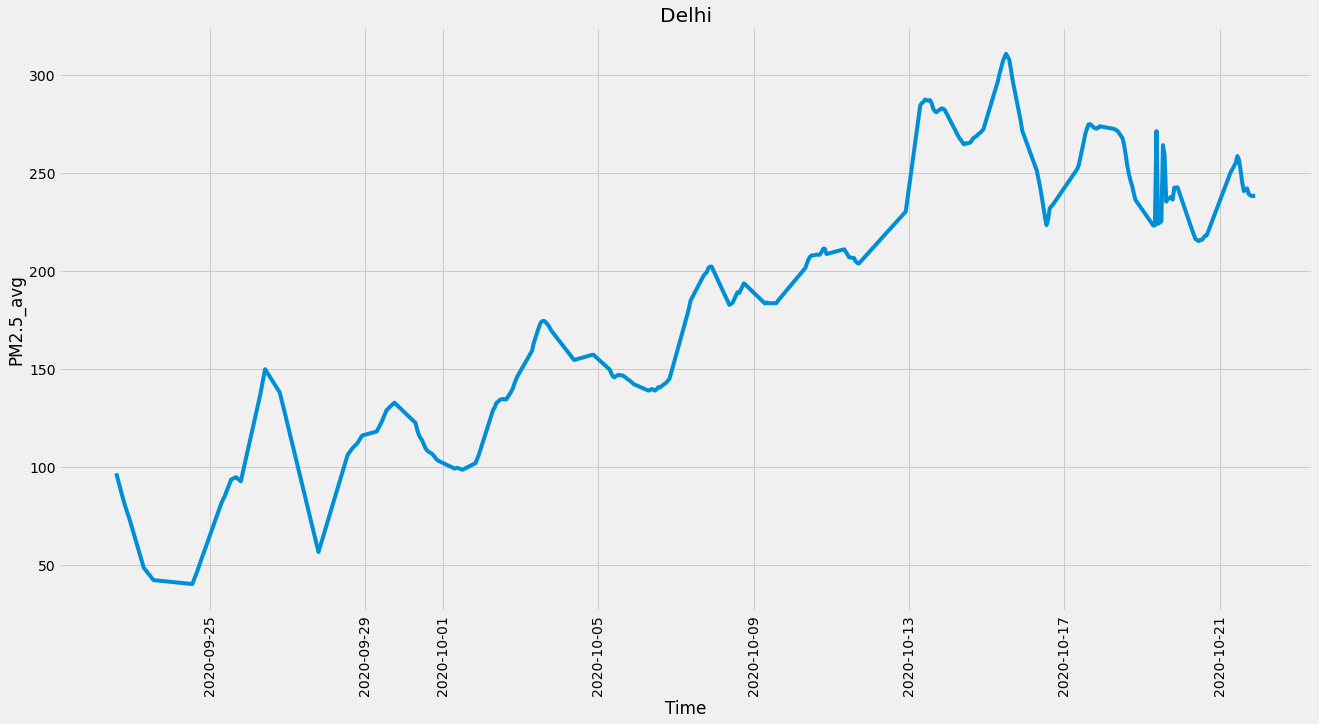

In [23]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'PM2.5_avg',x = 'Time',data = delhi,)
plt.xticks(rotation = 90)
plt.title('Delhi')
plt.show()

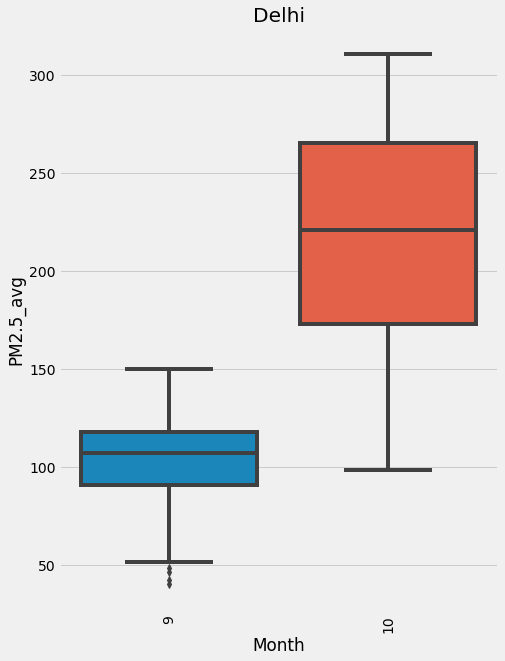

In [24]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'PM2.5_avg',x = 'Month',data = delhi)
plt.title('Delhi')
plt.xticks(rotation = 90)
plt.show()

In [25]:
delhi_sep = delhi[delhi.Month == 9].copy()
delhi_oct = delhi[delhi.Month == 10].copy()

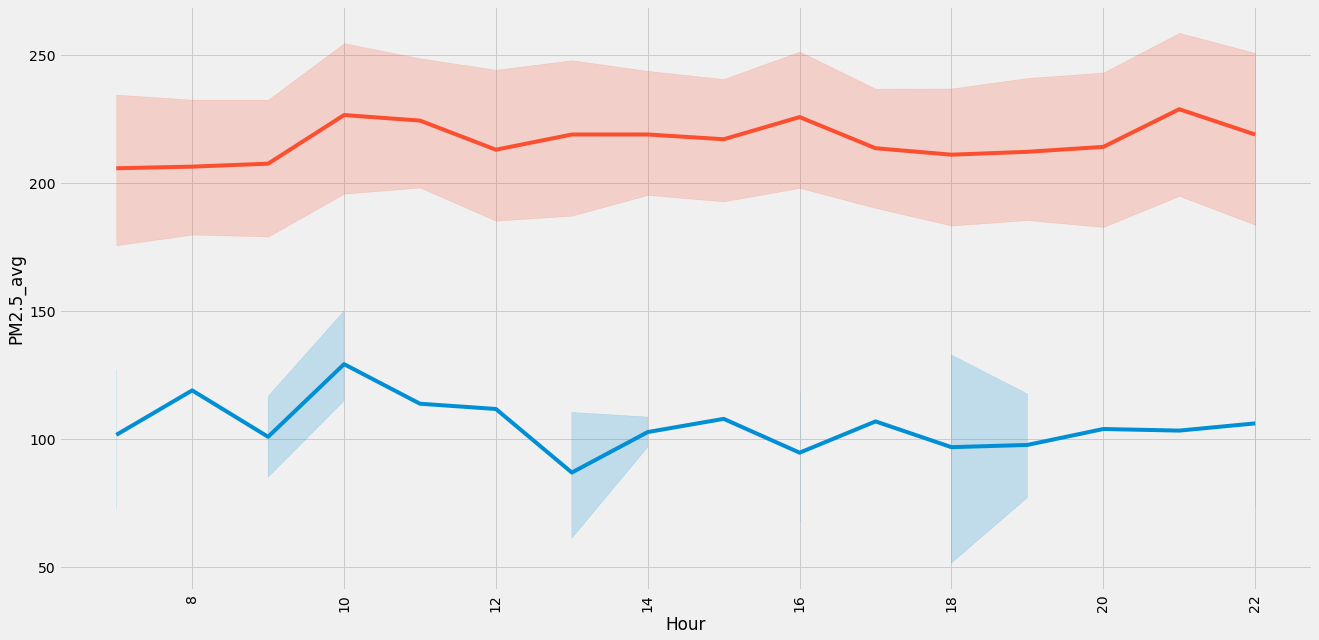

In [26]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'PM2.5_avg',x = 'Hour',data = delhi_sep)
sns.lineplot(y = 'PM2.5_avg',x = 'Hour',data = delhi_oct)
plt.xticks(rotation = 90)
plt.show()

In [27]:
mum = df_2.loc[df_2.City == 'Mumbai'].copy()
mum = mum.reset_index(drop = True)
mum = mum.round(2)
mum.head()

,City,Coordinates,Time,Month,Hour,Date,Day,PM2.5_min,PM2.5_avg,PM2.5_max
0,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 14:00:00,9,14,22-09-2020,1,25.67,55.67,98.00
1,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 16:00:00,9,16,22-09-2020,1,26.33,56.33,98.00
2,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 19:00:00,9,19,22-09-2020,1,18.33,54.89,98.00
3,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 22:00:00,9,22,22-09-2020,1,14.11,52.22,97.67
4,Mumbai,"[18.9387711, 72.8353355]",2020-09-23 04:00:00,9,4,23-09-2020,2,12.11,43.89,97.33


(265, 10)


<AxesSubplot:xlabel='Day', ylabel='PM2.5_avg'>

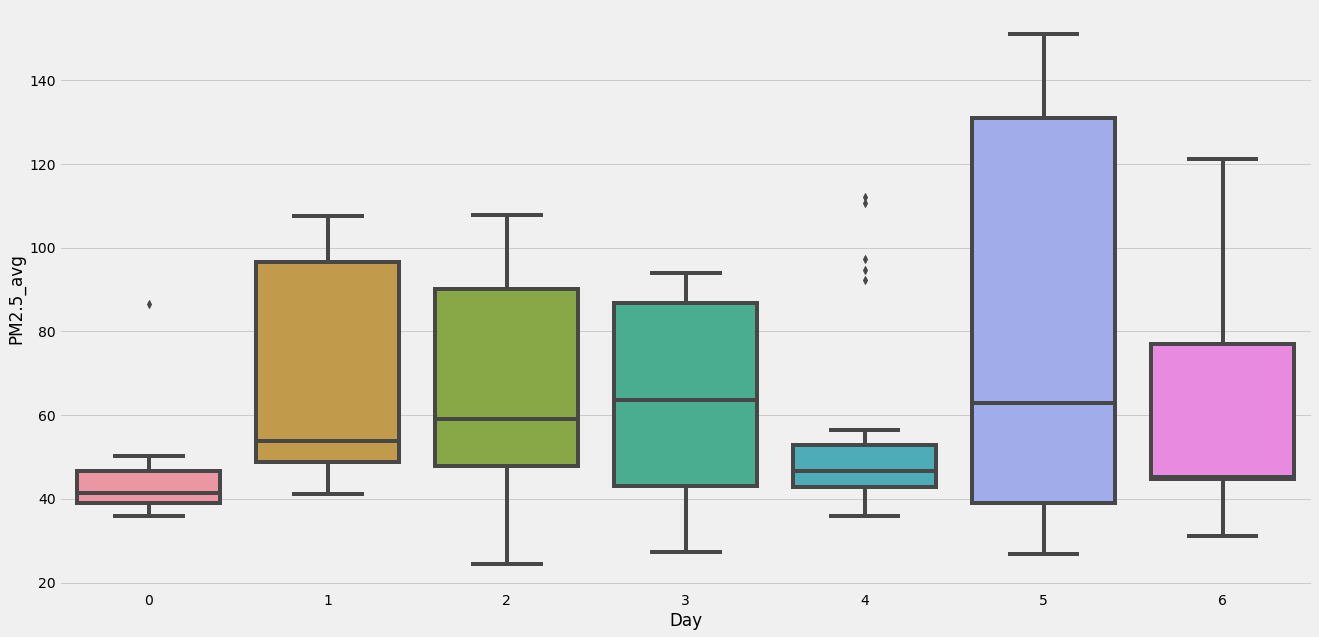

In [28]:
mum = mum[(mum.Hour >= 7) & (mum.Hour <= 22)]
print(mum.shape)
plt.figure(figsize = (20,10))
sns.boxplot(y = 'PM2.5_avg',x = 'Day',data = mum)

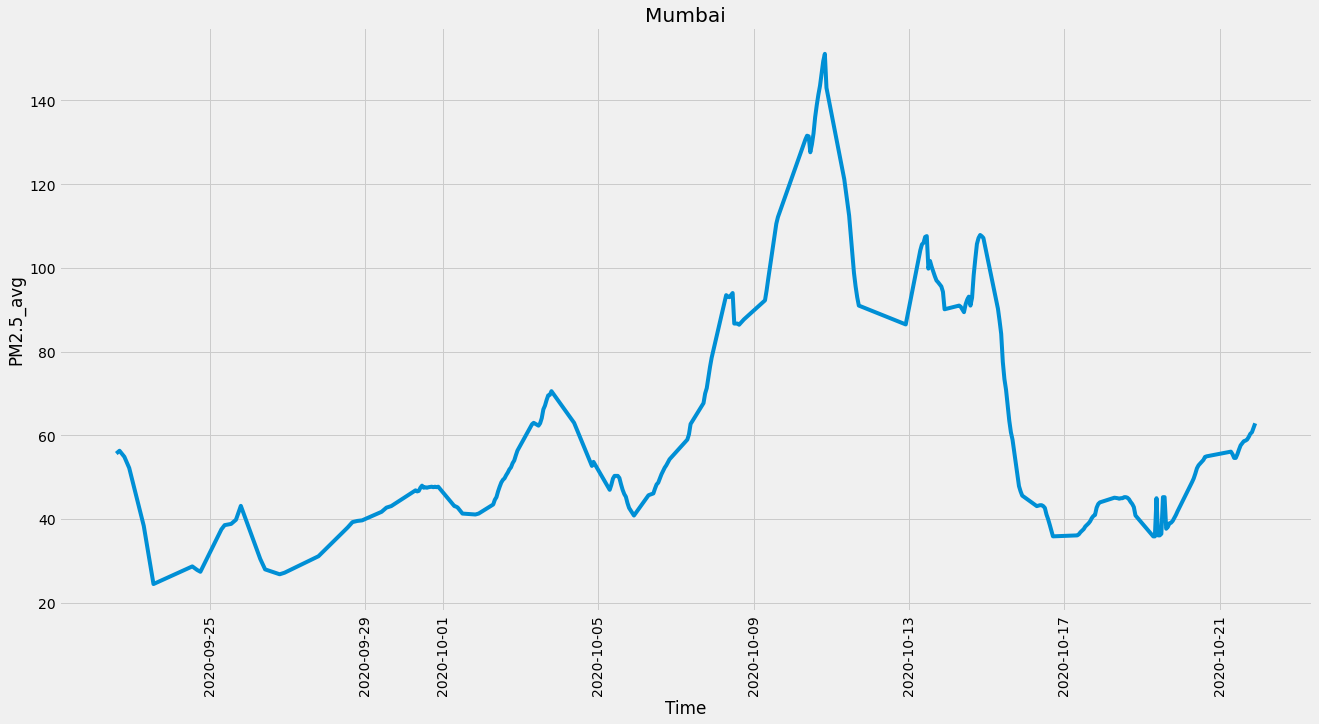

In [29]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'PM2.5_avg',x = 'Time',data = mum)
plt.title('Mumbai')
plt.xticks(rotation = 90)
plt.show()

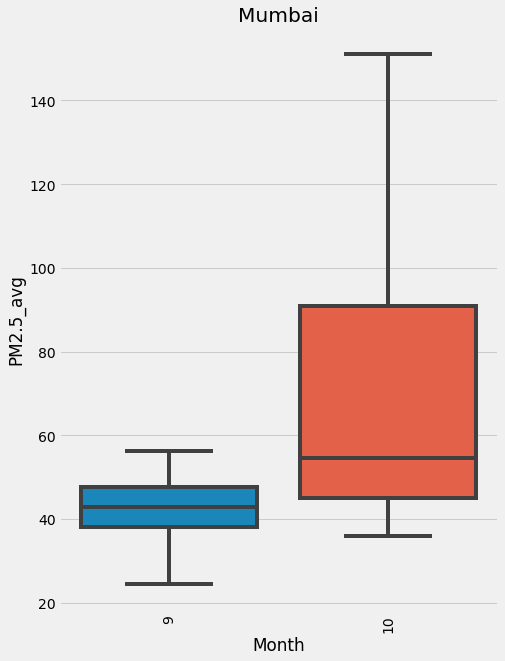

In [30]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'PM2.5_avg',x = 'Month',data = mum)
plt.title('Mumbai')
plt.xticks(rotation = 90)
plt.show()

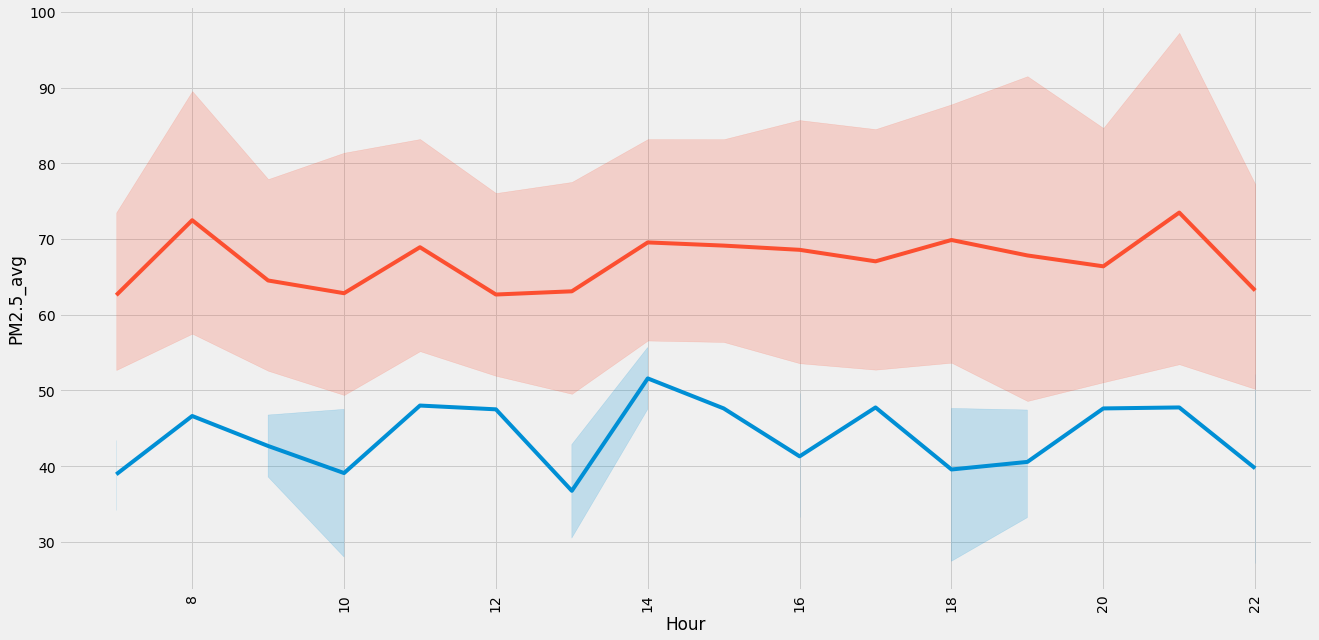

In [31]:
mum_sep = mum[mum.Month == 9].copy()
mum_oct = mum[mum.Month == 10].copy()
plt.figure(figsize = (20,10))
sns.lineplot(y = 'PM2.5_avg',x = 'Hour',data = mum_sep)
sns.lineplot(y = 'PM2.5_avg',x = 'Hour',data = mum_oct)
plt.xticks(rotation = 90)
plt.show()

In [32]:
delhi.groupby(['Day'])['PM2.5_avg'].mean().reset_index()

,Day,PM2.5_avg
0,0,188.289118
1,1,199.233778
2,2,201.932909
3,3,200.137931
4,4,161.688857
5,5,212.808864
6,6,221.985217
